# General

In [368]:
import matplotlib, matplotlib.pyplot as plt
import numpy as np
import colorsys

import lib_operations as operations
import lib_data_load as data_load
from lib_models import model_3sr,model_4pr,model_5pr

def scale_lightness(input_color, scale_l):
    rgb = matplotlib.colors.ColorConverter.to_rgb(input_color)
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

_plot_vis           = {}
_plot_vis['color']  = ['black','red','blue','green','orange','purple','brown','pink']
_plot_vis['style']  = ['solid','dashed','dotted','dashdot']
_plot_vis['marker'] = ['o','v','s','D','X']
_plot_vis['style-marker'] = [[a,b] for a in _plot_vis['style'] for b in _plot_vis['marker'] ]
_plot_vis['hatch'] = ['','','','','']#['//', '\\\\', '||',  'OO', 'oo',]

make_plot = lambda n,m,s=[1,1]: plt.subplots(n,m,figsize=(m*4*s[0],n*3*s[1]),squeeze=False,layout='tight')

np.set_printoptions(suppress=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 11})

In [369]:
# THE BEST SETTINGS
_root = 'result/new_550/15_1.0x/T-1000_tau-10000/'
_test_name = 'MMMU_MMM_MMMD-0.0_0.0_0.032'

_model_set = [model_3sr,model_4pr]

results = operations.load_results(root=_root,test_name=_test_name,T_sim=1000, model_set=_model_set)

operations.tabulate(results,title='Full Data',test_type_show=['MMMU','MMM','MMMD'])
operations.tabulate(results,title='Errors-Average', test_type_show=['AVG'],
vars=['err_l2_50', 'err_l2_500', 'err_l2_1000','err_l1_50', 'err_l1_500', 'err_l1_1000','dif_t50_pr','abs_del_a','time_scale_mean'])


+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                           Full Data                                                                                                                                            |
+-------+------+---------------------+------------------------------+-------------------------------+---------------------------------------------+-----------+------------+-------------+-----------+------------+-------------+------------+----------+----------+-----------+-----------------+
| model | type |         rho         |              a               |              m_eq             |                  time_sca

# Pulse Mass Absorbtion

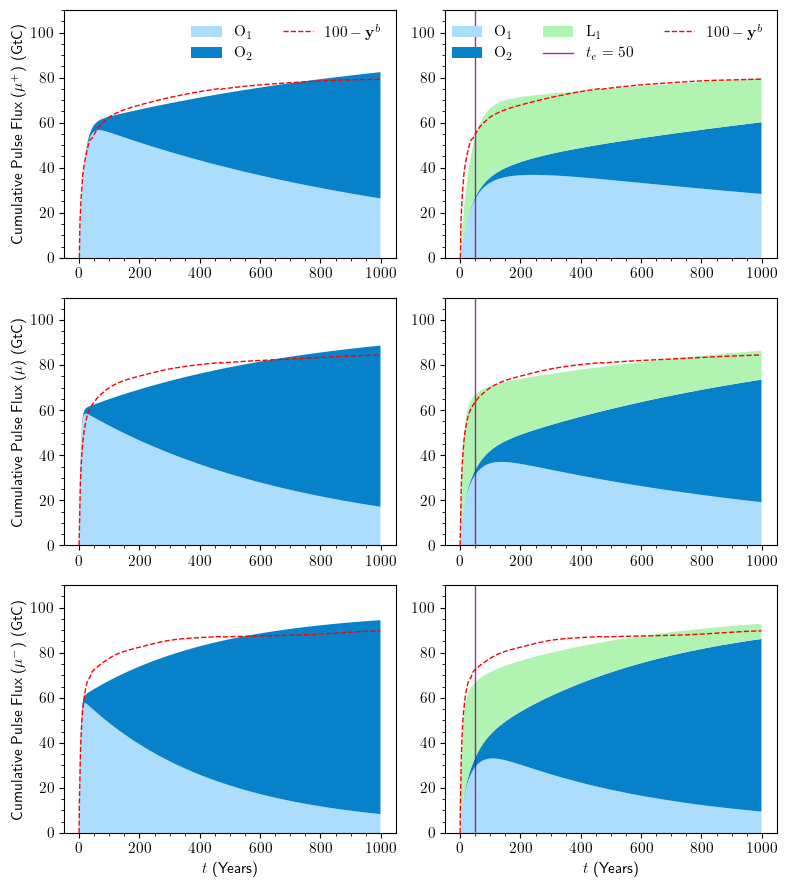

In [370]:
fig, axs = make_plot(3,len(results.keys()))
for model_inx,model_name in enumerate(results.keys()):    
    [_,_,info]= results[model_name]['model']()
    
    for test_type_inx,test_type_name in enumerate(results[model_name]['test_type_set']):
            
        if test_type_name in ['AVG'] :
            continue

        m_sim = results[model_name]['m_sim'][test_type_inx]
        m_benchmark= results[model_name]['m_benchmark'][test_type_inx]
        data_set  =[]
        color_set =[]
        hatch     =[]

        for i,m_i in enumerate(m_sim):

            temp = info['m_names'][i].split('_')
            m_name_class = temp[0]
            m_name_lvl   = 1 

            if len(temp)==2:
                m_name_lvl = (int(temp[1])/1.1)

            if 'AT' in m_name_class:
                 continue 
            elif 'O_' in info['m_names'][i]:
                lvl = int(info['m_names'][i].split('_')[1])
                data_set.append(m_i)
                color_set.append(scale_lightness('lightskyblue', 1/m_name_lvl))
                hatch.append(_plot_vis['hatch'][lvl-1])

            elif 'L_' in info['m_names'][i]:
                lvl = int(info['m_names'][i].split('_')[1])
                data_set.append(m_i)
                color_set.append(scale_lightness('lightgreen', 1/m_name_lvl))
                hatch.append(_plot_vis['hatch'][3+lvl-1])

        stacks = axs[test_type_inx,model_inx].stackplot(range(0,len(m_benchmark)),data_set,colors=color_set )

        if 'PR' in model_name:
            axs[test_type_inx,model_inx].axvline(x=50,color='purple',alpha=0.8,linewidth=1)

        axs[test_type_inx,model_inx].plot(100-m_benchmark,
                    linewidth=1,
                    color='red',
                    linestyle='--',
                    )
                
        #print(color_set)

        # print(hatch)
        for stack, hatch in zip(stacks, hatch):
            stack.set_hatch(hatch)

        axs[test_type_inx,model_inx].minorticks_on()

            
        axs[test_type_inx,model_inx].set_ylim(top=110)


if len(_model_set)>0:
    axs[0,0].legend([r'$\textrm{O}_1$',r'$\textrm{O}_2$',r'$100-\mathbf{y}^{b}$'],frameon=False,loc='upper right',ncol=2)
if len(_model_set)>1:
    axs[0,1].legend([r'$\textrm{O}_1$',r'$\textrm{O}_2$',r'$\textrm{L}_1$',r'$t_e=50$',r'$100-\mathbf{y}^{b}$'],frameon=False,loc='upper right',ncol=3)
if len(_model_set)>2:
    axs[0,2].legend([r'$\textrm{O}_1$',r'$\textrm{O}_2$',r'$\textrm{L}_1$',r'$\textrm{L}_2$',r'$t_e=50$',r'$100-\mathbf{y}^{b}$'],frameon=False,loc='upper right',ncol=3)

axs[0,0].set_ylabel(r'Cumulative Pulse Flux ($\mu^+$) (GtC)')
axs[1,0].set_ylabel(r'Cumulative Pulse Flux ($\mu$) (GtC)')
axs[2,0].set_ylabel(r'Cumulative Pulse Flux ($\mu^-$) (GtC)')  

for model_inx,model_name in enumerate(results.keys()):   
    axs[-1,model_inx].set_xlabel(r'$t$ (Years)')       



fig.savefig('doc/fig/analyse_cum_flux_flux.png', dpi=300)


# ATM Pulse Mass Decay

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


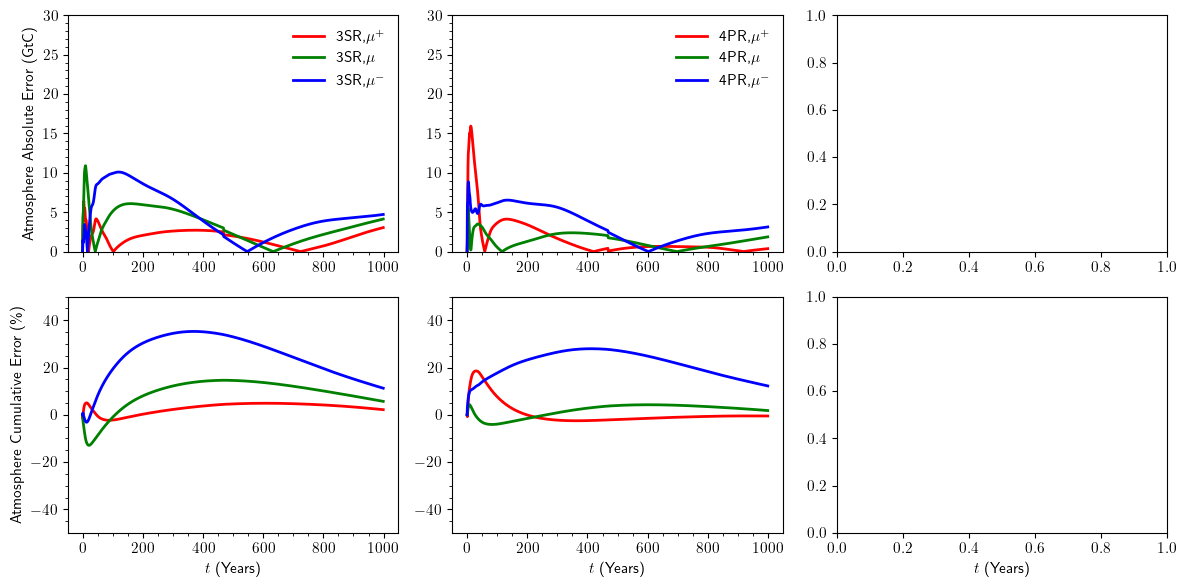

In [371]:
fig, axs = make_plot(2,3)
for model_inx,model_name in enumerate(results.keys()):   
        
    [_,_,info]= results[model_name]['model']()

    for test_type_inx,test_type_name in enumerate(results[model_name]['test_type_set']):
            
        if test_type_name == 'AVG':
            continue
            
        A          = results[model_name]['A'][test_type_inx]
        m_eq       = results[model_name]['m_eq'][test_type_inx]
        T          = 1000#len(results[model_name]['m_benchmark'][test_type_inx])
        [data_pulse,_] = data_load.pulse_fraction(test_type=test_type_name,T=T) 
        data_pulse=data_pulse* 100
            
        
        e = [0]*T
        e[0] =100
        [m,_,_]      = operations.simulate(A=A,m_eq=m_eq,m0=m_eq,T=T,e=e)


        for i in range(0,m.shape[0]):
            m[i,:] = m[i,:] - m_eq[i] 

        if test_type_name=='MMMU':
            label = model_name+ ",$\mu^+$"
            color =  'red'
        elif test_type_name=='MMMD':
            label = model_name+",$\mu^-$"
            color =  'blue'
        elif  test_type_name=='MMM':
            label = model_name+ ",$\mu$"
            color =  'green'
        else:
             label = test_type_name


        axs[0,model_inx].plot((np.abs( m[0,0:T]-data_pulse)) ,
                        linewidth=2,
                        alpha=1,
                        label=label,
                        color = color,
            )

        axs[1,model_inx].plot(100* (np.cumsum( m[0,0:T])- np.cumsum(data_pulse) ) /np.cumsum(data_pulse) ,
                        linewidth=2,
                        alpha=1,
                        label=label,
                        color = color
            )

        axs[0,model_inx].minorticks_on()
        axs[1,model_inx].minorticks_on()


        axs[0,model_inx].set_ylim(0,30)
        axs[1,model_inx].set_ylim(-50,50)

axs[0,0].legend(frameon=False,loc='upper right',ncol=1)
axs[0,1].legend(frameon=False,loc='upper right',ncol=1)
axs[0,2].legend(frameon=False,loc='upper right',ncol=1)

axs[0,0].set_ylabel(r'Atmosphere Absolute Error (GtC)')
axs[1,0].set_ylabel(r'Atmosphere Cumulative Error (\%)')
                                           
axs[-1,0].set_xlabel(r'$t$ (Years)')       
axs[-1,1].set_xlabel(r'$t$ (Years)')      
axs[-1,2].set_xlabel(r'$t$ (Years)')   

fig.savefig('doc/fig/analyse_err.png', dpi=300)


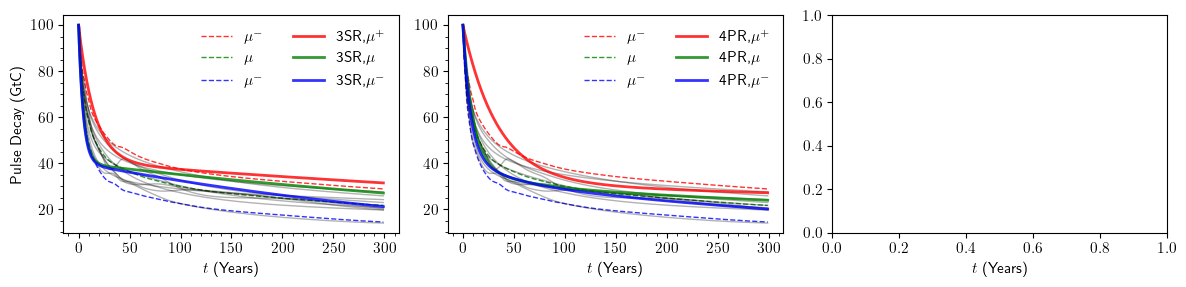

In [372]:
benchmark_list = ['MMMU','MMM','MMMD','NCAR','BERN3D','BERN25D', 'CLIMBER2','DCESS','GENIE','LOVECLIM','MESMO','UVIC29','BERNSAR']#['NCAR','BERN3D','BERN25D', 'CLIMBER2','DCESS','GENIE','LOVECLIM','MESMO','UVIC29','BERNSAR']

fig, axs = make_plot(1,3,[1,1])

T = 300

for model_inx,model_name in enumerate(results.keys()):  

    for i,benchmark_i in enumerate(benchmark_list):
        [d,_] = data_load.pulse_fraction(test_type=benchmark_i,T=T) 
        d=d* 100

        if benchmark_i=='MMMU':
            axs[0,model_inx].plot(d,label=r'$\mu^{-}$',linewidth=1,alpha=.8,color='red',linestyle='--')
        elif benchmark_i=='MMM':
            axs[0,model_inx].plot(d,label=r'$\mu$',        linewidth=1,alpha=.8,color='green',linestyle='--')
        elif benchmark_i=='MMMD':
            axs[0,model_inx].plot(d,label=r'$\mu^{-}$',linewidth=1,alpha=.8,color='blue',linestyle='--')
        else:
            axs[0,model_inx].plot(d,linewidth=1,alpha=.3,color='black')

    for test_type_inx,test_type_name in enumerate(results[model_name]['test_type_set']):
            
        if test_type_name in ['AVG'] :
            continue

        A          = results[model_name]['A'][test_type_inx]
        m_eq       = results[model_name]['m_eq'][test_type_inx]

        e = np.zeros(T)
        e[0]=100
        [m,_,_]      = operations.simulate(A=A,m_eq=m_eq,m0=m_eq,T=T,e=e)

        for j in range(0,A.shape[0]):
            m[j,:] = m[j,:] - m_eq[j]


        if test_type_name=='MMMU':
            label = model_name+ ",$\mu^+$"
            color =  'red'
        elif test_type_name=='MMMD':
            label = model_name+",$\mu^-$"
            color =  'blue'
        elif  test_type_name=='MMM':
            label = model_name+ ",$\mu$"
            color =  'green'
        else:
             label = test_type_name

        axs[0,model_inx].plot(m[0,:],label=label,linewidth=2,alpha=.8,color=color)
        axs[0,model_inx].legend(frameon=False,ncol=2)


    axs[0,model_inx].minorticks_on()

axs[0,0].set_ylabel(r'Pulse Decay (GtC)')
axs[0,0].set_xlabel(r'$t$ (Years)')
axs[0,1].set_xlabel(r'$t$ (Years)')
axs[0,2].set_xlabel(r'$t$ (Years)')


fig.savefig('doc/fig/sim_pulse.png', dpi=300)




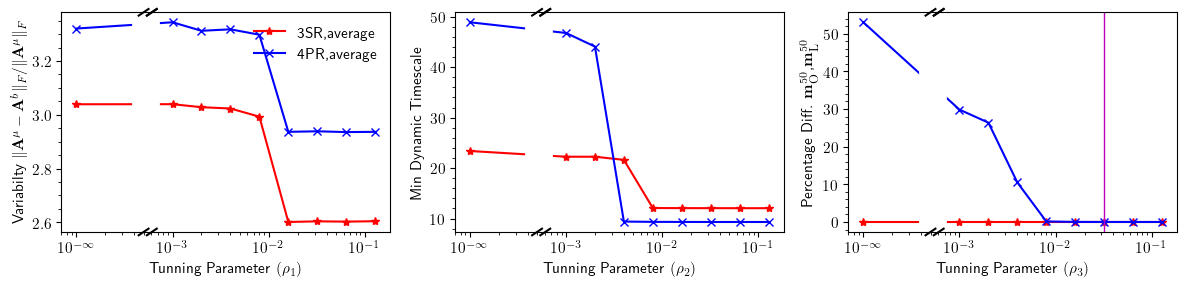

In [373]:
def zero_break_Line(ax,x,is_log=True):

    xmin,xmax = ax.get_xlim()

    if is_log:
        z = (np.log10(x) - np.log10(xmin)) / (np.log10(xmax)-np.log10(xmin))
    else:
        z = (x - xmin) / (xmax-xmin)

    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them

    ax.axvline(x*1.05,linewidth=20, color='w',alpha=1)
    #ax.axvline(x*1.05,linewidth=12, color='k',alpha=.1)


    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((z-d,z+d),(-d,+d), **kwargs)
    ax.plot((z-d,z+d),(1-d,1+d), **kwargs)
    ax.plot((z*1.1-d,z*1.1+d), (-d,+d), **kwargs)
    ax.plot((z*1.1-d,z*1.1+d),(1-d,1+d), **kwargs)
    ax.plot((z*1.1-d,z*1.1+d),(1-d,1+d), **kwargs)


    temp = [item.get_text() for item in ax.get_xticklabels()]
    temp[0] =r'$\mathdefault{10^{-\infty}}$'

    ax.set_xticklabels(temp)


#rho_set      = [0.0, 0.005, 0.01, 0.05, 0.1, 1.0] 
#rho_set_plot = [0.001, 0.005, 0.01, 0.05, 0.1, 1.0]


rho_set      = [0.    , 0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128]
rho_set_plot = [0.0001, 0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128]

rho_sel = results['3SR']['rho']

p = len(results.keys())


test_name_set1 = []
test_name_set2 = []
test_name_set3 = []

for i in range(0,len(rho_set)):


    test_name_set1+=['MMMU_MMM_MMMD'+'-'+'_'.join([str(rho_set[i]),str(rho_sel[1]),str(rho_sel[2])])]
    test_name_set2+=['MMMU_MMM_MMMD'+'-'+'_'.join([str(rho_sel[0]),str(rho_set[i]),str(rho_sel[2])])]
    test_name_set3+=['MMMU_MMM_MMMD'+'-'+'_'.join([str(rho_sel[0]),str(rho_sel[1]),str(rho_set[i])])]

err_0 = np.ones(shape=(p,len(rho_set)))
err_1 = np.ones(shape=(p,len(rho_set)))
err_2 = np.ones(shape=(p,len(rho_set)))

for test_inx,test_name in enumerate(test_name_set1):
    results = operations.load_results(root=_root,test_name=test_name,T_sim=1000, model_set=_model_set,multiplier=1)
    for model_inx, model_name in enumerate(results.keys()): 

        # Compute the first metric
        temp = 0
        A_mean = np.mean(results[model_name]['A'],0) 
        for A in results[model_name]['A']:
            delta = A_mean - A
            temp += np.mean(np.abs((delta.flatten()+1e-6) / (A_mean.flatten()+1e-6)))
        err_0[model_inx,test_inx] = temp + 1e-6

for test_inx,test_name in enumerate(test_name_set2):
    results = operations.load_results(root=_root,test_name=test_name,T_sim=1000, model_set=_model_set,multiplier=1)
    for model_inx, model_name in enumerate(results.keys()): 
        # Compute the second metric
        temp = 0
        for A in results[model_name]['A'][0:-1]:

            [eig_val, eig_vec] = operations.eig(A)
            tau = 1./np.abs(eig_val[0:-1])
            temp += np.min(tau)
        err_1[model_inx,test_inx] = temp + 1e-6

for test_inx,test_name in enumerate(test_name_set3):
    results = operations.load_results(root=_root,test_name=test_name,T_sim=1000, model_set=_model_set,multiplier=1)
    for model_inx, model_name in enumerate(results.keys()): 
        # Compute the thrid metric
        temp = 0
        for val in results[model_name]['dif_t50_pr'][0:3]:
            temp += val/3
        err_2[model_inx,test_inx] = temp + 1e-6

#normalize
colors = ['r','b','g']
style = ['-*','-x','-+']

fig, axs = make_plot(1,3,[1,1])

for i in range(0,p):
    err_0[i,:]=err_0[i,:]#/err_0[i,0]
    err_1[i,:]=err_1[i,:]#/err_1[i,0]
    err_2[i,:]=err_2[i,:]#/err_2[i,0]

    axs[0,0].semilogx(rho_set_plot,err_0[i,:],style[i],color=colors[i])
    axs[0,1].semilogx(rho_set_plot,err_1[i,:],style[i],color=colors[i])
    axs[0,2].semilogx(rho_set_plot,err_2[i,:],style[i],color=colors[i])

axs[0,0].set_xticks(ticks=[1e-4,1e-3,1e-2,1e-1])
axs[0,1].set_xticks(ticks=[1e-4,1e-3,1e-2,1e-1])
axs[0,2].set_xticks(ticks=[1e-4,1e-3,1e-2,1e-1])

axs[0,0].axvline(rho_sel[0],linewidth=1, color='m',alpha=1)
axs[0,1].axvline(rho_sel[1],linewidth=1, color='m',alpha=1)
axs[0,2].axvline(rho_sel[2],linewidth=1, color='m',alpha=1)

zero_break_Line(axs[0,0],rho_set_plot[1]/2)
zero_break_Line(axs[0,1],rho_set_plot[1]/2)
zero_break_Line(axs[0,2],rho_set_plot[1]/2)

axs[0,0].minorticks_on()
axs[0,1].minorticks_on()
axs[0,2].minorticks_on()

axs[0,0].set_xlabel(r'Tunning Parameter $(\mathbf{\rho}_1)$')
axs[0,1].set_xlabel(r'Tunning Parameter $(\mathbf{\rho}_2)$')
axs[0,2].set_xlabel(r'Tunning Parameter $(\mathbf{\rho}_3)$')

axs[0,0].set_ylabel(r'Variabilty $\|\mathbf{A}^{\mu}-\mathbf{A}^b\|_{F} / \|\mathbf{A}^{\mu}\|_{F}$')
axs[0,1].set_ylabel(r'Min Dynamic Timescale')
axs[0,2].set_ylabel(r'Percentage Diff. $\mathbf{{m}}^{50}_{\textnormal{\small{O}}}$,$\mathbf{{m}}^{50}_{\textnormal{\small{L}}}$')

axs[0,0].legend(['3SR,average','4PR,average'],frameon=False,loc='upper right',ncol=1)

fig.savefig('doc/fig/analyse_pen.png', dpi=300)